# Python Projeto Final

## 1. Instalando e Carregando os Pacotes

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [2]:
# Imports

# Manipulação de dados
import numpy as np
import pandas as pd

# Visualização
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark --iversions

numpy     : 1.21.5
matplotlib: 3.5.2
seaborn   : 0.11.2
pandas    : 1.4.4



## 2. Exploração de Dados

Vamos explorar dados de crédito presentes neste neste [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv). Os dados estão no formato CSV e contém informações sobre clientes de uma instituição financeira. Em especial, estamos interessados em explicar a segunda coluna, chamada de **default**, que indica se um cliente é adimplente(`default = 0`), ou inadimplente (`default = 1`), ou seja, queremos entender o porque um cliente deixa de honrar com suas dívidas baseado no comportamento de outros atributos, como salário, escolaridade e movimentação financeira. Uma descrição completa dos atributos está abaixo.

> O atributo de interesse (`default`) é conhecido como **variável resposta** ou **variável dependente**, já os demais atributos que buscam explicá-la (`idade`, `salário`, etc.) são conhecidas como **variáveis explicatívas**, **variáveis independentes** ou até **variáveis preditoras**.



| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |


### 2.1 Base de dados

Base no formato .CSV carregado no Kaggle.

Lendo os dados num dataframe panda, podemos verificar visualmente suas colunas e linhas.

In [4]:
# Carregando a base de dados.
df = pd.read_csv('Python_M10_support material.csv', na_values='na')

In [5]:
# Colunas
df.columns

Index(['id', 'default', 'idade', 'sexo', 'dependentes', 'escolaridade',
       'estado_civil', 'salario_anual', 'tipo_cartao',
       'meses_de_relacionamento', 'qtd_produtos', 'iteracoes_12m',
       'meses_inativo_12m', 'limite_credito', 'valor_transacoes_12m',
       'qtd_transacoes_12m'],
      dtype='object')

In [6]:
# Amostra dos dados
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


### 2.2. Estrutura dos Dados

Vamos conhecer a estrutura dos dados separando a base por:

1. Todos os clientes

2. Clientes adimplentes

3. Clientes inadimplentes

Esses cliente estão sendo representando na coluna `default` por **0** (_**adimplente**_) ou **1** (_**inadimplente**_).

In [7]:
# Quantidade de linhas e colunas do dataset completo
df.shape

(10127, 16)

In [8]:
# Quantidade de linhas e colunaas para Clientes Adimplentes
df[df['default'] == 0].shape

(8500, 16)

In [9]:
# Quantidade de linhas e colunas para Clientes Inadimplentes
df[df['default'] == 1].shape

(1627, 16)

In [10]:
# Calculando a proporção
qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape

print(f"A proporção de clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A proporção de clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")

A proporção de clientes adimplentes é de 83.93%
A proporção de clientes inadimplentes é de 16.07%


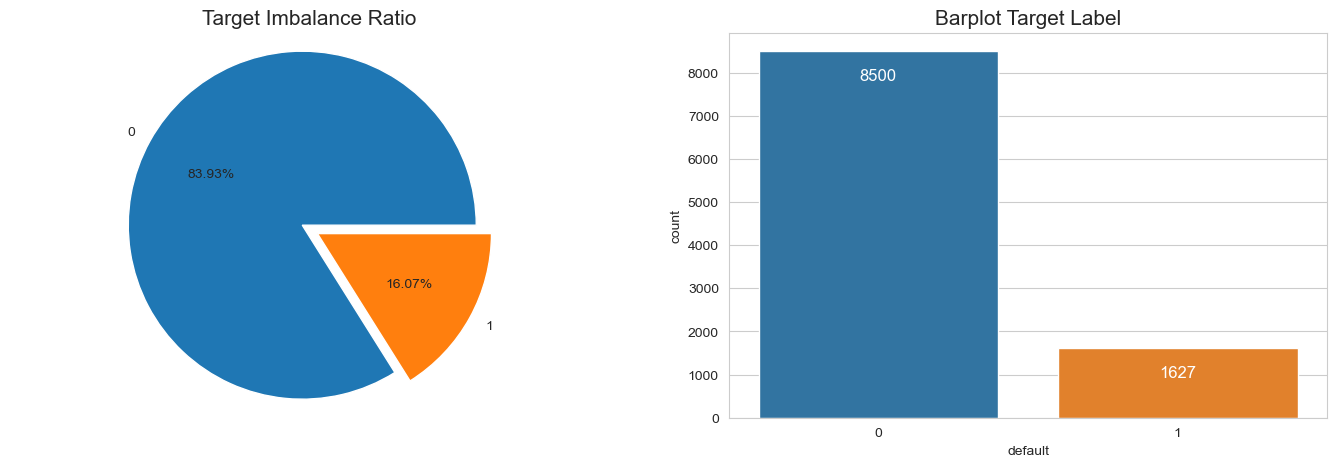

In [11]:
# Identificando dados desbalanceados
plt.figure(figsize = (17,(100)/20))

plt.subplot(121)

plt.pie(round(df['default'].value_counts() / len(df) * 100, 2),
        labels = list(df['default'].value_counts().index),
        autopct = "%.2f%%",
        explode = (0,0.1))

plt.axis("equal")
plt.title("Target Imbalance Ratio", size = 15)

plt.subplot(122)
ax = sns.countplot(data = df, x = 'default')
plt.title("Barplot Target Label", fontsize = 15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', 
                (p.get_x()+0.4, 
                 p.get_height()), 
                ha = 'center', 
                va = 'top', 
                color = 'white', 
                size = 12)

- Isso significa que nossa base de dados é desbalanceada em relação a variável resposta `default`. Temos muito mais clientes adimplentes do que inadimpletes. Isso é normal para uma instituição financeira.

### 2.3. Schema

In [12]:
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [13]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       10127 non-null  int64 
 1   default                  10127 non-null  int64 
 2   idade                    10127 non-null  int64 
 3   sexo                     10127 non-null  object
 4   dependentes              10127 non-null  int64 
 5   escolaridade             8608 non-null   object
 6   estado_civil             9378 non-null   object
 7   salario_anual            9015 non-null   object
 8   tipo_cartao              10127 non-null  object
 9   meses_de_relacionamento  10127 non-null  int64 
 10  qtd_produtos             10127 non-null  int64 
 11  iteracoes_12m            10127 non-null  int64 
 12  meses_inativo_12m        10127 non-null  int64 
 13  limite_credito           10127 non-null  object
 14  valor_transacoes_12m     10127 non-nul

- Podemos observar que as colunas `limite_credito` e `valor_transacoes_12m` ambas são do tipo _**object**_. Isso aconteceu pois elas estão no formato brasileiro que utiliza o (**.**) e não a (**,**), por isso não foram identificadas pelo Python como valores de ponto flutuante. Vamos precisar tratar isso para fazer as análises de forma apropriada.

 **Atributos categóricas**

In [14]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


- As colunas `escolaridade`, `estado_civil` e `salario anual` podem apresentar dados faltantes, por isso na contagem apresentam um número menor que as demais variáveis categóricas. Temos que verificar e tratar essas colunas também. 

**Atributos numéricos**

In [15]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


- As colunas com atributo numérico não possuem dados faltantes, entretanto, as `colunas limite_credito` e `valor_transacoes_12m` devem ser tratadas para análise de dados.

- Em **idade**, os valores médios são 46,325, mediana 46,00 e desvio padrão 8,016. Isso significa que a média de idade é de 46 anos. Com idade mínima de 26 e máxima de 73.


- Em **dependentes**, os valores médios são 2,346, mediana 2,00 e desvio padrão 1,298. Isso significa que a média é de 2 dependentes. Variando entre o mínimo de 0 e máximo de 5 dependentes.


- Em **meses_de_relacionamento**, os valores médios são 35,928, mediana 36,00 e desvio padrão 7,986. Isso significa que a média de relacionamento entre os clientes e a instituição é de 36 meses. Variando entre o mínimo de 13 e máximo de 56 meses.


- Em **qtd_produtos**, os valores médios são 3.812, mediana 4,00 e desvio padrão 1.554. Isso significa que a média de produtos contratados pelos clientes é de 4 produtos. Variando entre o mínimo de 1 e máximo de 6 produtos.


- Em **iteracoes_12m**, os valores médios são 2,455, mediana 2,00 e desvio padrão 1,106. Isso significa que a média de iterações com os clientes no ano é de 2 repetições dentro de 12 meses. Variando entre o mínimo de 0 e máximo de 6.


- Em **meses_inativos_12m**, os valores médios são 2,341, mediana 2,00 e desvio padrão 1,106. Isso significa que á média de inatividade dentro do ano é de 2 meses. Variando entre o mínimo de 0 e o máximo de 6.


- Em **qtd_transacoes_12m**, os valores médios são 64,858, mediana 67,00 e desvio padrão 23,472. Isso significa que é a média é de 67 transações dentro de 12 meses Variando entre o mínimo de 10 e máximo de 139 transações.

### 2.4. Dados Faltantes

Dados faltantes podem ser:

- Vazios (`""`;
- Nulos (`None`);
- Não disponíveis ou aplicaveis (`na`, `NA`, etc.);
- Não numérico (`nan`, `NaN`, `NAN`, etc).

Identificando os dados faltantes abaixo.

In [16]:
# Verificando quais colunas possuem dados faltantes
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

- As categorias `escolaridade`, `estado_civil` e `salario_anual` realmente estão com dados faltantes.
Além dessa identificação, faremos o levantamento estatístico de cada coluna.

A função abaixo levanta algumas estatisticas sobre as colunas dos dados faltantes.

In [17]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:

  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qdt, _ = df[df[col].isna()].shape
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

In [18]:
# Imprimindo os dados para análise de todos os clientes
stats_dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [19]:
# Imprimindo os dados para análise de Clientes Adimplentes
stats_dados_faltantes(df=df[df['default'] == 0])

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


In [20]:
# Imprimindo os dados para análise de Clientes Inadimplentes
stats_dados_faltantes(df=df[df['default'] == 1])

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


Podemos fazer a exclusão dessas linhas pois o impacto bai ser o mesmo em ambas as categorias, mantendo assim a proporção entre elas.

## 3. Transformação e limpeza de dados

### 3.1 Correção de schema

- Na etapa de exploração percebemos que as colunas `limite_credito` e `valor_transacoes_12m` foram interpretadas como categóricas (**object**). Vamos fazer essa correção transformando em **numéricas**.

In [21]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [22]:
df[['limite_credito', 'valor_transacoes_12m']].head()

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


- Criamos uma função lambda para limpar dados. Vamos testar essa função aplicando o método map, caso o retorno seja positivo podemos aplicar nas colunas que precisam de tratamento.

In [23]:
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))

valores_originais = ['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
valores_limpos = list(map(fn, valores_originais))

print(valores_originais)
print(valores_limpos)

['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
[12691.51, 8256.96, 3418.56, 3313.03, 4716.22]


A função está funcionando corretamente. Podemos então aplicar as colunas de interesse.

In [24]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

In [25]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

- Podemos observar que as variáveiss `limite_credito` e `valor_transacoes_12m` foram alteradas para o tipo numérico _float64_.

### 3.2 Visualizando as Variáveis Categóricas

In [26]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


### 3.3 Verificando a Distribuição das Variáveis Numéricas

In [27]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


### 3.3. Remoção de dados faltantes

Vamos analisar a estrutura dos dados novamente para ver se a proporção está correta e em seguida fazer a remoção dos dados faltantes.

In [28]:
# Checando valores duplicados
df.duplicated('id').sum()

0

In [29]:
# Criamos uma cópia do dataframe original
df2 = df.copy()

In [30]:
df2.dropna(inplace=True)

In [31]:
# Quantidade linhas e colunas para todos os clientes
df2.shape

(7081, 16)

In [32]:
# Quantidade linhas e colunas para Clientes Adimplentes
df2[df2['default'] == 0].shape

(5968, 16)

In [33]:
# Quantidade linhas e colunas para Clientes Inadimplentes
df2[df2['default'] == 1].shape

(1113, 16)

In [34]:
qtd_total, _ = df2.shape
qtd_adimplentes, _ = df2[df2['default'] == 0].shape
qtd_inadimplentes, _ = df2[df2['default'] == 1].shape

print(f"Clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"Clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")

Clientes adimplentes é de 84.28%
Clientes inadimplentes é de 15.72%


## 4. Visualização de dados

- Vamos visualizar e correlacionar as variáveis explicativas com a variável resposta buscando compreender o que leva um clliente a inadimplência.

In [35]:
df2_adimplente = df2[df2['default'] == 0]

In [36]:
df2_inadimplente = df2[df2['default'] == 1]

### 4.1. Visualizações categóricas

Nesta seção, vamos visualizar a relação entre a variável resposta default com os atributos categóricos.

In [37]:
df2.select_dtypes('object').head(n=5)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


**Escolaridade**

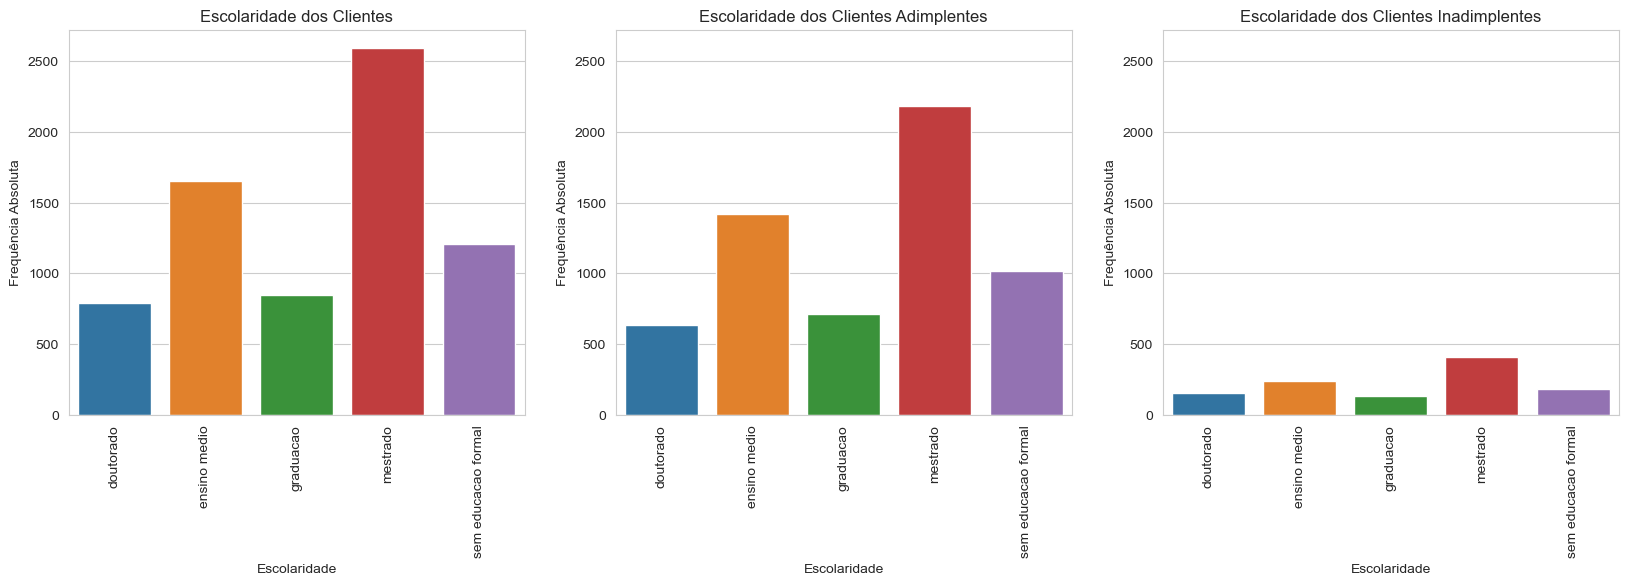

In [38]:
coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max = df2.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df2, df2_adimplente, df2_inadimplente]:

  df2_to_plot = dataframe[coluna].value_counts().to_frame()
  df2_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df2_to_plot[coluna] = df2_to_plot.index
  df2_to_plot.sort_values(by=[coluna], inplace=True)
  df2_to_plot.sort_values(by=[coluna])

  f = sns.barplot(x=df2_to_plot[coluna], y=df2_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

**Salário Anual**

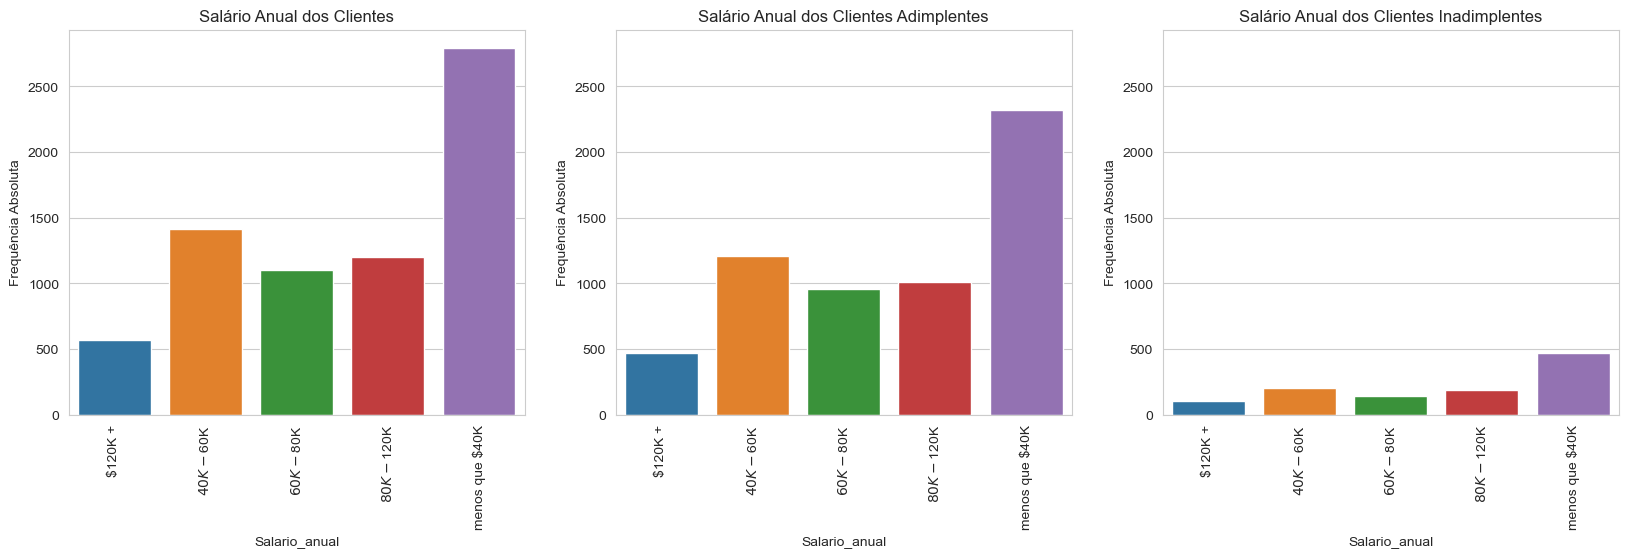

In [39]:
coluna = 'salario_anual'
titulos = ['Salário Anual dos Clientes', 'Salário Anual dos Clientes Adimplentes', 'Salário Anual dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df2, df2_adimplente, df2_inadimplente]:

  df2_to_plot = dataframe[coluna].value_counts().to_frame()
  df2_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df2_to_plot[coluna] = df2_to_plot.index
  df2_to_plot.reset_index(inplace=True, drop=True)
  df2_to_plot.sort_values(by=[coluna], inplace=True)

  f = sns.barplot(x=df2_to_plot[coluna], y=df2_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))
  eixo += 1

**Tipo de Cartão**

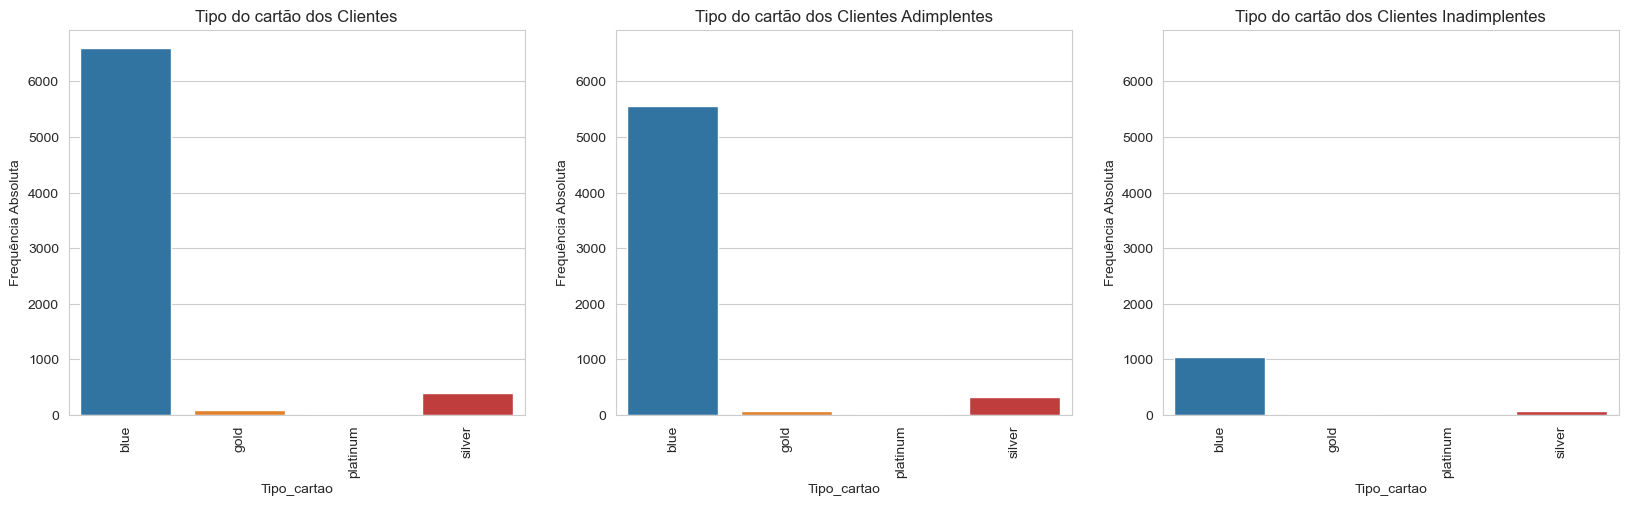

In [40]:
coluna = 'tipo_cartao'
titulos = ['Tipo do cartão dos Clientes', 'Tipo do cartão dos Clientes Adimplentes', 'Tipo do cartão dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max = df2.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df2, df2_adimplente, df2_inadimplente]:

  df2_to_plot = dataframe[coluna].value_counts().to_frame()
  df2_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df2_to_plot[coluna] = df2_to_plot.index
  df2_to_plot.sort_values(by=[coluna], inplace=True)
  df2_to_plot.sort_values(by=[coluna])

  f = sns.barplot(x=df2_to_plot[coluna], y=df2_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

### 4.2. Visualizações numéricas

Visualização entre a variável resposta default com os atributos numéricos.

In [41]:
df2.drop(['id', 'default'], axis=1).select_dtypes('number').head(n=5)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


**Quantidade de Transações nos Últimos 12 Meses**

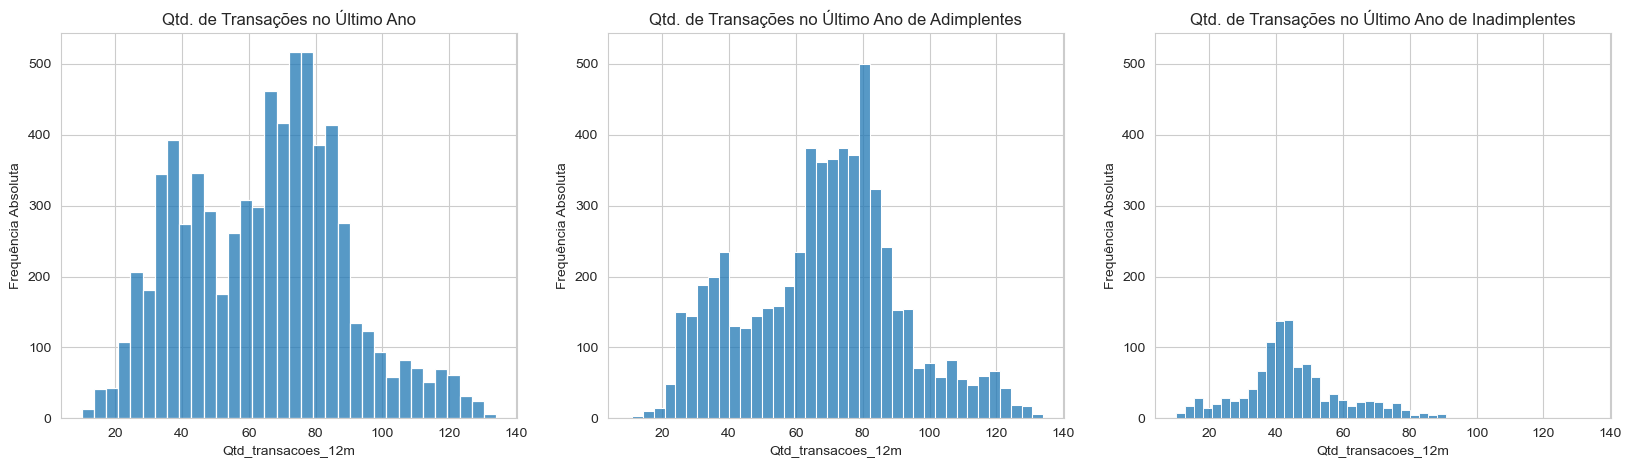

In [42]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df2, df2_adimplente, df2_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

**Valor das Transações nos Últimos 12 Meses**

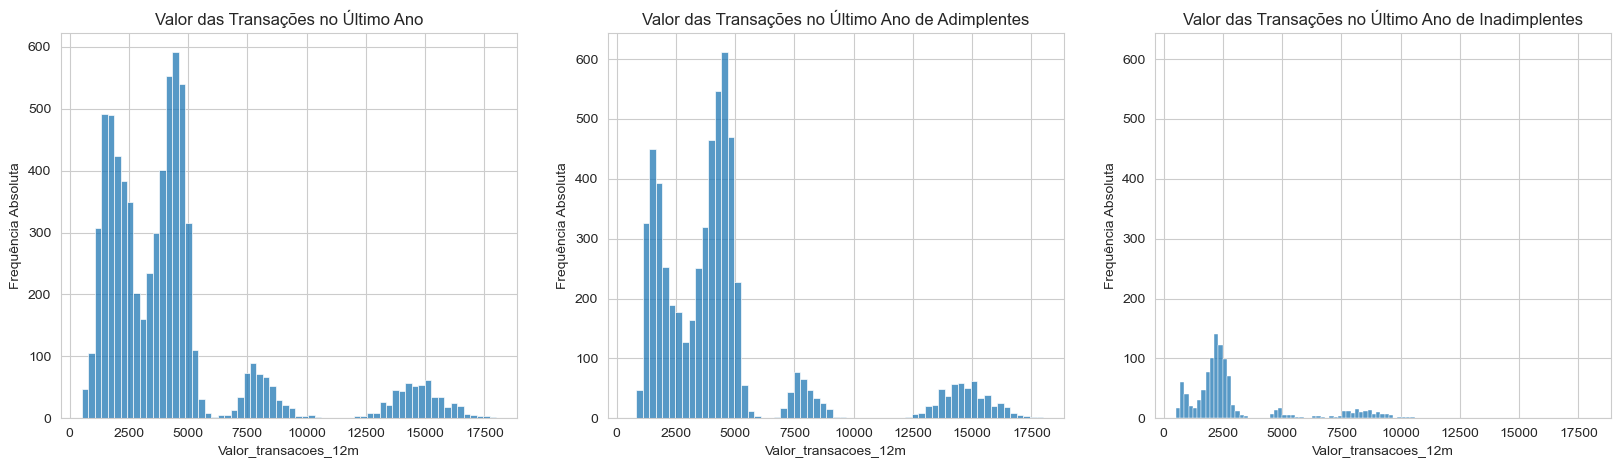

In [43]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano de Adimplentes', 'Valor das Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df2, df2_adimplente, df2_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

**Relação entre Valor e Quantidade de Transações no Último Ano**

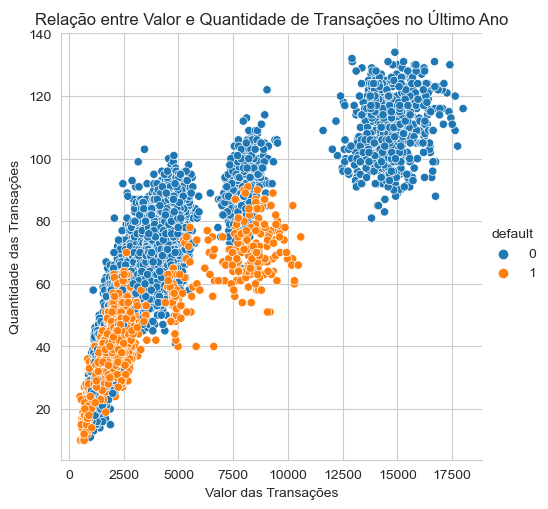

In [44]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df2, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano', 
    xlabel='Valor das Transações', 
    ylabel='Quantidade das Transações'
  )

### 4.3. Visualização em barras com categorias Adimplentes e Inadimplentes

Vamos alterar o schema da coluna `default` para substituir o 0 e o 1 por Adimplentes e Inadimplentes respectivamente.

In [45]:
# Alterando o schema
data_types_dict = {'default': str}
df2 = df2.astype(data_types_dict)
df2.dtypes

# Substituindo os dados.
fn2 = lambda valor: str(valor.replace("1", "Inadimplente").replace("0", "Adimplente"))

# Verificando os dados
valores_originais = ['1', '0']
valores_alterados = list(map(fn2, valores_originais))
#print(valores_originais)
#print(valores_alterados)

# Aplicando a função na base
df2['default'] = df2['default'].apply(fn2)

# Visualização do Tipo
print(df2.dtypes)
print("")

# Visualização da tabela
df2.head(n=5)

id                           int64
default                     object
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object



,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,Adimplente,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,12691.51,1144.90,42
1,818770008,Adimplente,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,8256.96,1291.45,33
2,713982108,Adimplente,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,3418.56,1887.72,20
4,709106358,Adimplente,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,4716.22,816.08,28
5,713061558,Adimplente,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,4010.69,1088.07,24


**Barras agrupadas**

_Relação entre Adimplentes/Inadimplentes e Valores das Transações no Último Ano_

_Relação entre Adimplentes/Inadimplentes e Quantidade de Transações no Último Ano_

[Text(0.5, 1.0, 'Relação entre Adimplentes/Inadimplentes e Quantidade de Transações no Último Ano'),
 Text(0.5, 0, 'Quantidade de Transações'),
 Text(0, 0.5, 'Frequência Absoluta')]

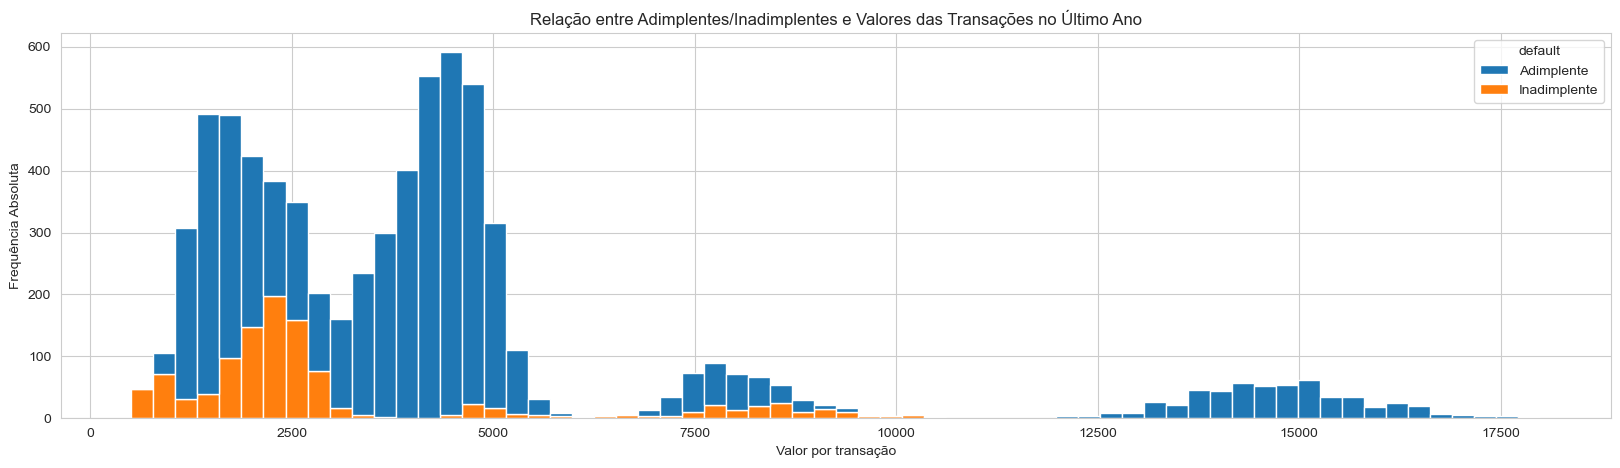

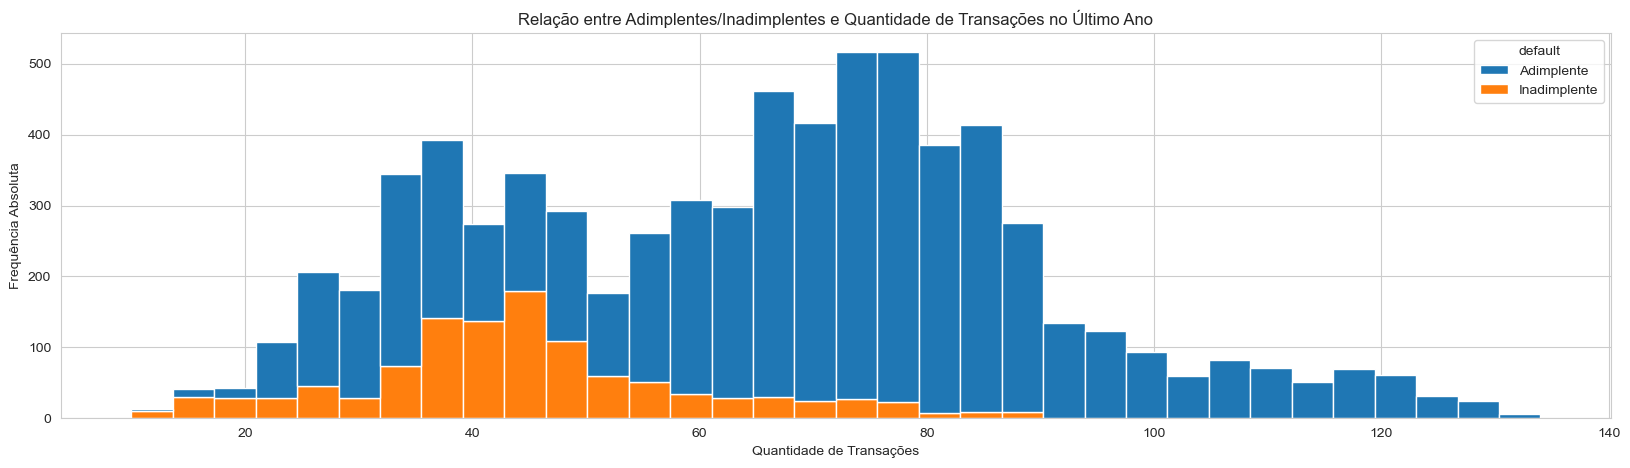

In [46]:
# Primeiro gráfico
coluna = 'valor_transacoes_12m'
titulos = ['Relação entre Adimplentes/Inadimplentes e Valores das Transações no Último Ano']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1, figsize=(20, 5), sharex=True)

f = sns.histplot(data= df2, x= coluna, alpha= 1, hue= 'default', multiple='stack')
f.set(title=titulos[eixo], xlabel='Valor por transação', ylabel='Frequência Absoluta')


# Segundo gráfico
coluna = 'qtd_transacoes_12m'
titulos = ['Relação entre Adimplentes/Inadimplentes e Quantidade de Transações no Último Ano']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1, figsize=(20, 5), sharex=True)

f = sns.histplot(data= df2, x= coluna, alpha= 1, hue= 'default', multiple='stack')
f.set(title=titulos[eixo], xlabel='Quantidade de Transações', ylabel='Frequência Absoluta')

### 5. Relatório Final

**Visualização de Atributos categóricos**

1. Em relação a variáveil `escolaridade`, a maior concentração de clientes possui algum tipo de ensino superior.
A quantidade de clientes sem educação formal também é grande, próxima a quantidade de clientes que tem ensino médio.
Quando comparamos o gráfico de todos os clientes com os clientes adimplentes vemos que esse padrão se mantém.
O mesmo padrão se mantém no gráfico de clientes inadimplentes. Temos apenas um pequena mudança entre os clientes com doutorados e graduados.
Podemos concluir que olhar para escolaridade não ajuda a explicar a inadimplência dos clientes.


2. Em relação a variável `salario_anual`, a maioria dos cliente ganha menos que 40K anual.
Existe um número menor de clientes que apresentam os maiores salários. Isso que representa bem a realidade.
O gráfico dos clientes adimplentes segue o padrão do gráfico de todos os clientes.
O mesmo comportamento se mantém também para os clientes inadimplentes.
Podemos concluir com isso que não existe relação para esses dados entre o salário anual e a inadimplência.


3. Em relação a variável `tipo_cartao`, a maioria dos clientes possuem o cartão do tipo Blue.
O mesmo padrão se repete nos gráficos de clientes adimplentes e inadimplentes.
Com isso concluimos que para essa base de dados não existe relação entre tipo de cartão e a inadimplência dos clientes.

 
**Visualização de Atributos numéricos**

1. No gráfico "Quantidade de Transações nos Últimos 12 Meses podemos observar que os clientes possuem maiores transações no intervalo entre 60 e 80 e também entre 20 e 40 transaçoes no último ano.
Clientes adimplentes e inadimplentes aprensentam um comportamento fora do padrão entre o intervalo de 20 a 60 transações. 
Isso pode nós ajudar a explicar a inadimplência dos clientes para essa nossa base de dados, pois essa área pode ser exatamente onde os clientes se tornam inadimplentes.
A instituição financeirde deve ter mais atenção com clientes que apresentam transações muito concentradas entre 20 e 60 nos últimos 12 meses, pois existe o risco de esses clientes se tornarem inadimplentes.


2. No gráfico "Valor das Transações nos Últimos 12 Meses",o valor estão concentrados entre 1000 e 5000 transações.
Os clientes adimplentes seguem esse padrão, mas temos uma pequena diferença no intervalo próximo de 2500.
Os clientes inadimplentes estão muito próximo dessa área de 2500. Isso também pode nos ajudar a explicar a inadimplencia dos clientes.


3. Na relação entre Valor e Quantidade de Transações no Último Ano podemos observar que clientes que possuem muitas transações e com valores altos constituem um grupo que não apresenta nenhum tipo de inadimplência.
Conforme vamos diminuindo a quantidade de transações e o seu valor, começamos a obter clientes inadimplentes. Temos um grupo concentrado entre o intervalo entre 7500 e 10000 e outro grupo entre 1000 e 6000 .
Observamos que quanto menor o número de transações nesses grupos com clientes inadimplentes, maior a chance de inadimplência.
Podemos concluir que é preciso se concentrar nos cliente que possuem de média a baixa transações.

**Visualização de Barras agrupadas**

Para facilitar as visualizações acima, montei dois gráficos com as barras agrupadas, onde fica fácil a visualização de onde ocorrem os casos de inadimplência.

Valores entre 1000 a 3000, 5000 e 7500 a 10000.
Número de transações de 10 a 90.